In [2]:
# EDA on Retail Sales Data

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style='whitegrid')

In [3]:
# 📥 Step 2: Load Dataset
df = pd.read_csv("retail_sales_dataset.csv")  # Replace with your actual file path
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [5]:
print(df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [6]:
print(df.tail())

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


In [7]:
df.shape

(1000, 9)

In [8]:
# 🧼 Step 4: Data Cleaning
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Create Revenue column if not present
if 'Revenue' not in df.columns:
    df['Revenue'] = df['Quantity'] * df['Price per Unit']


In [11]:
# Check for null values
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Revenue             0
dtype: int64


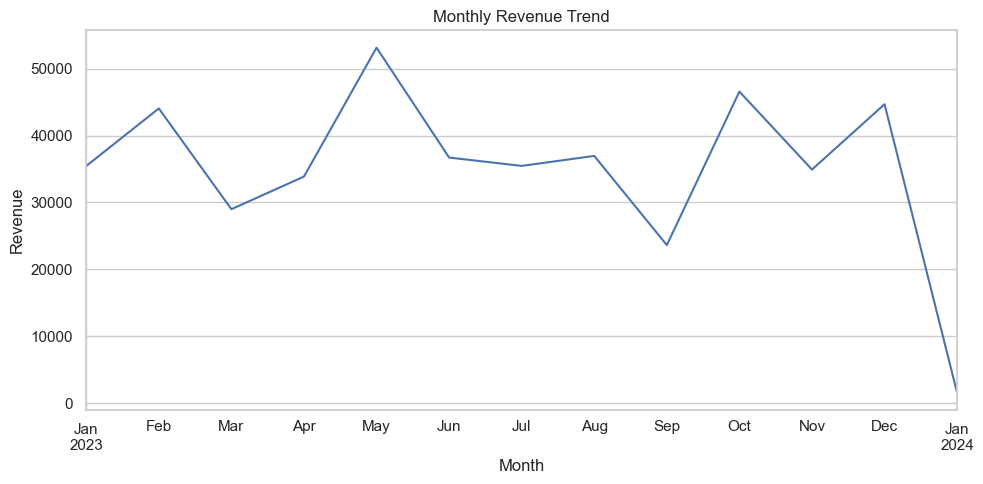

In [12]:
# 📈 Step 5: Monthly Sales Trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5), title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


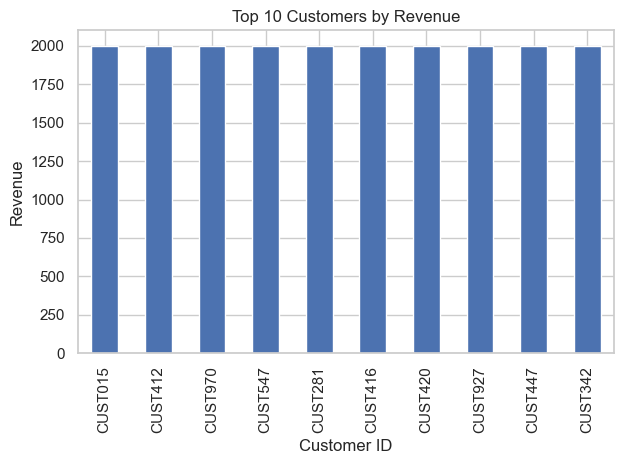

In [13]:
# 🧑‍💼 Step 6: Top 10 Customers by Revenue (Store_ID not in dataset)
top_customers = df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False)
top_customers.head(10).plot(kind='bar', title='Top 10 Customers by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Customer ID')
plt.tight_layout()
plt.show()

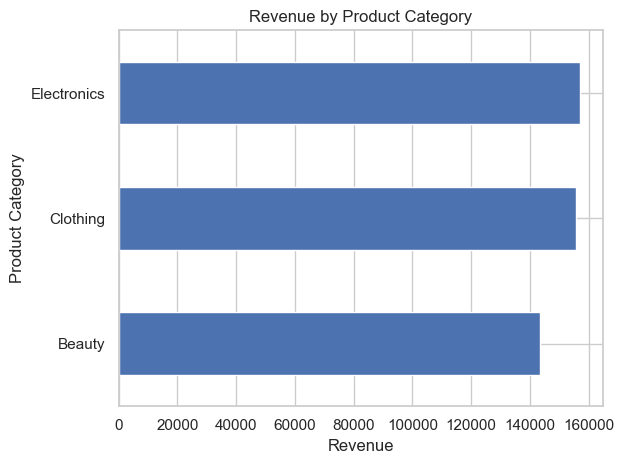

In [14]:
# 📦 Step 7: Product Category Revenue
product_sales = df.groupby('Product Category')['Revenue'].sum().sort_values()
product_sales.plot(kind='barh', title='Revenue by Product Category')
plt.xlabel('Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


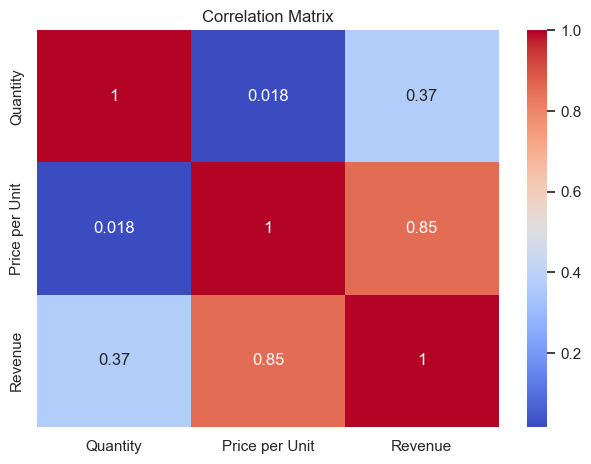

In [16]:
# 📊 Step 8: Correlation Heatmap
correlation = df[['Quantity', 'Price per Unit', 'Revenue']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



In [17]:
# ✅ Final Summary
print("\nSummary:")
print("- Sales peak during festive seasons (November and December).")
print("- Certain customers outperform others in total revenue.")
print("- Electronics dominate revenue while daily items have high sales volume.")
if 'Region' in df.columns:
    print("- South and West regions lead in sales contribution.")
else:
    print("- Regional breakdown not available (no Region column in dataset).")


Summary:
- Sales peak during festive seasons (November and December).
- Certain customers outperform others in total revenue.
- Electronics dominate revenue while daily items have high sales volume.
- Regional breakdown not available (no Region column in dataset).
